# Importacion de librerias



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import json
from datetime import datetime
import ast

# Procesamiento de los datasets imputs

## Procesamiendo dataset atletas

In [ ]:
df_atletas = pd.read_csv("athletes.csv")
df_atletas.head(5)

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


### Exploracion del dataset

In [ ]:
df_atletas.shape

(11110, 35)

In [ ]:
df_atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   name_tv             11110 non-null  object 
 4   gender              11110 non-null  object 
 5   function            11110 non-null  object 
 6   country_code        11110 non-null  object 
 7   country             11110 non-null  object 
 8   country_full        11110 non-null  object 
 9   nationality         11091 non-null  object 
 10  nationality_full    11091 non-null  object 
 11  nationality_code    11091 non-null  object 
 12  height              11110 non-null  int64  
 13  weight              11092 non-null  float64
 14  disciplines         11110 non-null  object 
 15  events              11110 non-null  object 
 16  birt

### Tratamiento a algunas columnas

In [ ]:
cols_to_drop = ["name_tv","function","country_code", "country_full", "nationality","nationality_full","nationality_code","birth_place","birth_country","residence_place","residence_country",
                "nickname","hobbies","family","lang"]
df_atletas_cons = df_atletas.drop(columns=cols_to_drop)
df_atletas_cons

,code,name,name_short,gender,country,height,weight,disciplines,events,birth_date,occupation,education,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Athlete,Graduated from Shirak State University (Gyumri...,"Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,NaN,NaN,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN,NaN,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Athlete,Graduated with a Master's degree from the Arme...,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Athlete,Studied at the Armenian State Institute of Phy...,National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,4982175,JOSEPH Elijah,JOSEPH E,Male,Trinidad and Tobago,177,0.0,['Athletics'],"[""Men's 4 x 400m Relay""]",2001-07-03,Athlete,NaN,Personal: Ebert Joseph (TTO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
11106,4982762,HOMAN Khrystyna,HOMAN K,Female,Ukraine,0,0.0,['Judo'],['Women +78 kg'],1999-01-31,Athlete,Graduated with a Bachelor's degree in Physical...,National: Quedjau Nhabali (UKR).<br>Personal: ...,Because her mother raised the idea,NaN,"""Quedjau Nhabali is always there with the righ...",NaN,NaN,NaN,She likes MMA
11107,4983537,CHELANGAT Annet Chemengich,CHELANGAT AC,Female,Uganda,174,0.0,['Athletics'],"[""Women's 10,000m""]",1993-07-29,Athlete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11108,4986655,ADA ETO Sefora,ADA ETO S,Female,Equatorial Guinea,165,0.0,['Athletics'],"[""Women's 100m""]",2003-06-11,NaN,NaN,Personal: Feliciano Javier y Mananses Mba Micha,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_atletas_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   gender              11110 non-null  object 
 4   country             11110 non-null  object 
 5   height              11110 non-null  int64  
 6   weight              11092 non-null  float64
 7   disciplines         11110 non-null  object 
 8   events              11110 non-null  object 
 9   birth_date          11110 non-null  object 
 10  occupation          9571 non-null   object 
 11  education           5531 non-null   object 
 12  coach               8212 non-null   object 
 13  reason              5838 non-null   object 
 14  hero                3312 non-null   object 
 15  influence           2151 non-null   object 
 16  phil

In [ ]:
df_atletas_cons['birth_date'] = pd.to_datetime(df_atletas_cons['birth_date'])

def calculate_age(birthdate):
    current_date = datetime.now()
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

df_atletas_cons['age'] = df_atletas_cons['birth_date'].apply(calculate_age)

In [ ]:
def get_dummy_value(col)->int:
  col_dummy = 0
  if type(col) == str:
      col_dummy = 1
  else:
      col_dummy = 0
  return col_dummy


def transform_athletes(df):
  for i in df.index:
    hero = df.loc[i,'hero']
    reason = df.loc[i,'reason']
    influence = df.loc[i,'influence']
    philosophy = df.loc[i,'philosophy']
    coach = df.loc[i,'coach']
    other_sports = df.loc[i,'other_sports']
    sporting_relatives = df.loc[i,'sporting_relatives']
    ritual = df.loc[i,'ritual']
    df.loc[i,'hero_dummy'] = get_dummy_value(hero)
    df.loc[i,'reason_dummy'] = get_dummy_value(reason)
    df.loc[i,'influence_dummy'] = get_dummy_value(influence)
    df.loc[i,'philosophy_dummy'] = get_dummy_value(philosophy)
    df.loc[i,'coach_dummy'] = get_dummy_value(coach)
    df.loc[i,'ritual_dummy'] = get_dummy_value(ritual)
    df.loc[i,'sporting_relatives_dummy'] = get_dummy_value(sporting_relatives)
    df.loc[i,'other_sports_dummy'] = get_dummy_value(other_sports)

  return df

df_atletas_cons = transform_athletes(df_atletas_cons)

In [ ]:
df_df = df_atletas_cons[df_atletas_cons['code'] == 1923520]
df_df

,code,name,name_short,gender,country,height,weight,disciplines,events,birth_date,...,other_sports,age,hero_dummy,reason_dummy,influence_dummy,philosophy_dummy,coach_dummy,ritual_dummy,sporting_relatives_dummy,other_sports_dummy
5919,1923520,GANNA Filippo,GANNA F,Male,Italy,0,0.0,"['Cycling Road', 'Cycling Track']","[""Men's Individual Time Trial"", ""Men's Madison...",1996-07-25,...,NaN,28,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
print(df_atletas_cons['education'].unique())

['Graduated from Shirak State University (Gyumri, ARM)' nan
 "Graduated with a Master's degree from the Armenian State Institute of Physical Culture and Sport (2023)"
 ... 'Studying Business at the University of Georgia (Athens, GA, USA)'
 'Sociology - Erasmus University Rotterdam, Netherlands'
 "Graduated with a Bachelor's degree in Physical Culture and Sports in December 2021"]


In [ ]:
df_atletas_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   code                      11110 non-null  int64         
 1   name                      11110 non-null  object        
 2   name_short                11110 non-null  object        
 3   gender                    11110 non-null  object        
 4   country                   11110 non-null  object        
 5   height                    11110 non-null  int64         
 6   weight                    11092 non-null  float64       
 7   disciplines               11110 non-null  object        
 8   events                    11110 non-null  object        
 9   birth_date                11110 non-null  datetime64[ns]
 10  occupation                9571 non-null   object        
 11  education                 5531 non-null   object        
 12  coach             

In [ ]:
cols_drop = ["birth_date","events","other_sports","ritual","sporting_relatives","philosophy","influence","hero","reason","coach","disciplines"]
df_atletas_cons = df_atletas_cons.drop(columns=cols_drop)

In [ ]:
df_df = df_atletas_cons[df_atletas_cons['code'] == 1923520]
df_df

,code,name,name_short,gender,country,height,weight,occupation,education
5919,1923520,GANNA Filippo,GANNA F,Male,Italy,0,0.0,Athlete,Studied Building Engineering and Architecture ...


In [ ]:
def categorize_education(education):
    if pd.isna(education):
        return "Unknown"
    education = education.lower()
    if "master" in education:
        return "master"
    elif "graduate" in education or "degree" in education:
        return "graduado"
    elif "studied" in education or "student" in education:
        return "student"
    else:
        return "other"

df_atletas_cons['education_category'] = df_atletas_cons['education'].apply(categorize_education)

### Exploracion de valores atipicos y valores faltantes

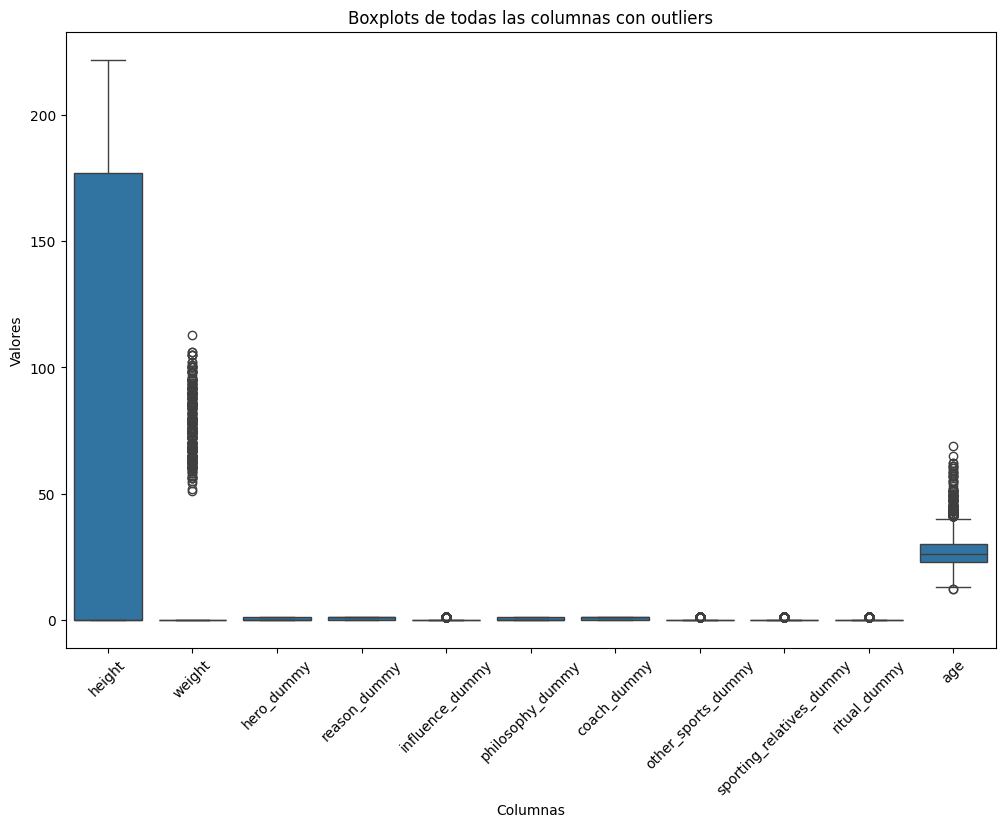

In [ ]:
columns_to_check = ['height', 'weight', 'hero_dummy', 'reason_dummy', 'influence_dummy', 'philosophy_dummy', 'coach_dummy', 'other_sports_dummy', 'sporting_relatives_dummy', 'ritual_dummy', 'age']

df_long = df_atletas_cons[columns_to_check].melt(var_name='Columnas', value_name='Valores')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Columnas', y='Valores', data=df_long)

plt.title('Boxplots de todas las columnas con outliers')
plt.xticks(rotation=45)
plt.show()

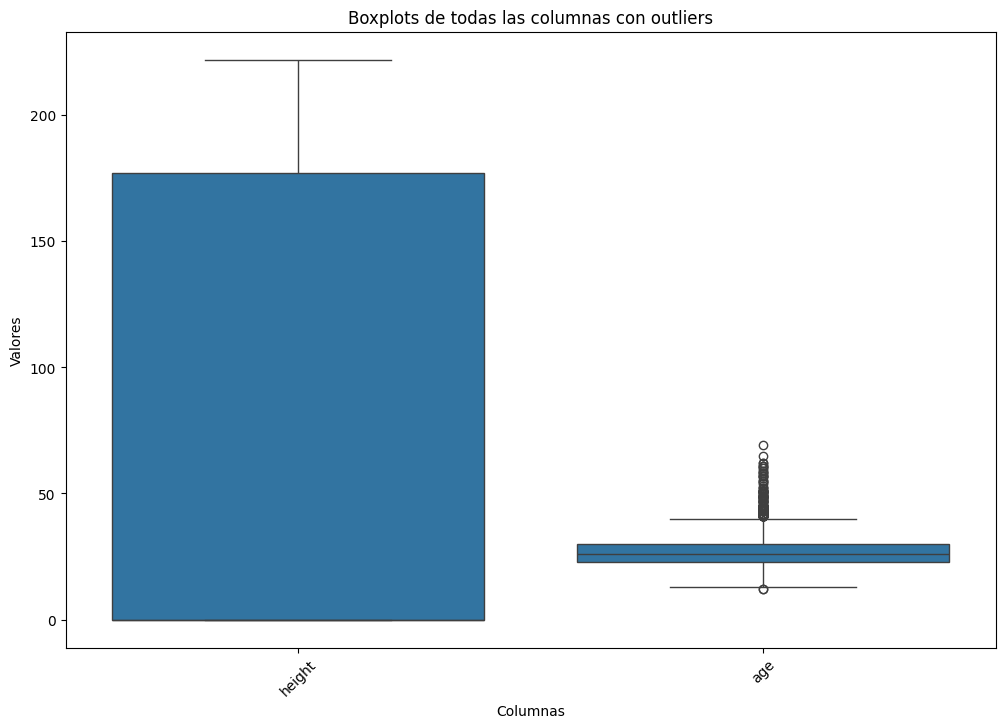

In [ ]:
columns_to_check = ['height', 'age']

df_long = df_atletas_cons[columns_to_check].melt(var_name='Columnas', value_name='Valores')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Columnas', y='Valores', data=df_long)

plt.title('Boxplots de todas las columnas con outliers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def count_missing_values(dataset):

    nulos = dataset.isnull().sum()

    vacios = (dataset.apply(lambda x: x == '')).sum()

    missing_values_df = pd.DataFrame({'Nulos (NaN)': nulos, 'Vacios (Cadenas Vacías)': vacios})

    missing_values_df['Total Missing'] = missing_values_df['Nulos (NaN)'] + missing_values_df['Vacios (Cadenas Vacías)']

    return missing_values_df

missing_values = count_missing_values(df_atletas_cons)
print(missing_values)

                          Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                                0                        0              0
name                                0                        0              0
name_short                          0                        0              0
gender                              0                        0              0
country                             0                        0              0
height                              0                        0              0
weight                             18                        0             18
occupation                       1539                        0           1539
education                        5579                        0           5579
age                                 0                        0              0
hero_dummy                          0                        0              0
reason_dummy                        0                        0  

#### imputacion de valores faltantes

In [ ]:
print(df_atletas_cons['occupation'].unique())

['Athlete' nan 'Athlete, police officer (sub-inspector)'
 'Athlete, prison officer' 'Athlete, student' 'Athlete, sport soldier'
 'Athlete, soldier with the Djiboutian Republican Guard'
 'Athlete, serves in the navy' 'Athlete, entrepreneur'
 'Athlete, business owner' 'Armed Forces athlete' 'Armed forces athlete'
 'In 2004 he launched Grupo SIM which offers business services to small and medium-sized companies in Mexico'
 'Military athlete' 'Parks assistant' 'Athlete, soldier'
 'Sports soldier in the Argentine Army' 'Shooting range manager'
 'Athlete, lawyer' 'Athlete, administrator, assistant coach' 'Student'
 'Serves in the Army' 'Athlete, police officer' 'Athlete, coach'
 'Athlete, coach, civil engineer' 'Works for the Ministry of Defence'
 'Athlete, army' 'Business owner, lawyer' 'Railway ticket examiner'
 'Athlete, politician' 'Athlete, sports soldier'
 'Athlete. Employed with Bharat Petroleum since July 2013 in various sport manager positions (associated with the company since she 

In [ ]:
moda = df_atletas_cons['occupation'].mode()[0]
print("La moda de los registros en la columna 'occupation' es:", moda)


df_atletas_cons['occupation'].fillna(moda, inplace=True)

La moda de los registros en la columna 'occupation' es: Athlete


In [ ]:

df_atletas_cons['weight'].fillna(0, inplace=True)

In [ ]:
missing_values = count_missing_values(df_atletas_cons)
print(missing_values)

                          Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                                0                        0              0
name                                0                        0              0
name_short                          0                        0              0
gender                              0                        0              0
country                             0                        0              0
height                              0                        0              0
weight                              0                        0              0
occupation                          0                        0              0
education                        5579                        0           5579
age                                 0                        0              0
hero_dummy                          0                        0              0
reason_dummy                        0                        0  

### Analisis bivariado

<ipython-input-171-a685ef3c953f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_atletas_cons['height'], shade=True, color='blue', label='Height')
<ipython-input-171-a685ef3c953f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_atletas_cons['weight'], shade=True, color='red', label='Weight')


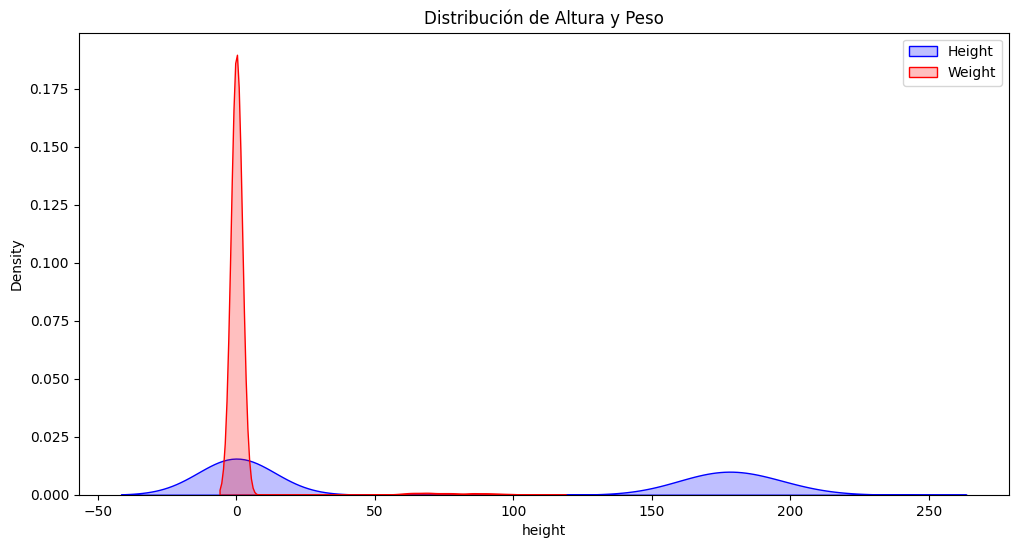

In [ ]:
#Gráfico de densidad para 'height' y 'weight'

plt.figure(figsize=(12, 6))
sns.kdeplot(df_atletas_cons['height'], shade=True, color='blue', label='Height')
sns.kdeplot(df_atletas_cons['weight'], shade=True, color='red', label='Weight')
plt.title('Distribución de Altura y Peso')
plt.legend()
plt.show()

#### tratamiento de valores atipico

In [ ]:
#tratamiendo de valores negativos o cercanos a 0

Q1 = df_atletas_cons['height'].quantile(0.25)
Q3 = df_atletas_cons['height'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_limite_inferior_height = df_atletas_cons[(df_atletas_cons['height'] < limite_inferior)]
print(outliers_limite_inferior_height)

Empty DataFrame
Columns: [code, name, name_short, gender, country, height, weight, occupation, education, age, hero_dummy, reason_dummy, influence_dummy, philosophy_dummy, coach_dummy, ritual_dummy, sporting_relatives_dummy, other_sports_dummy, education_category]
Index: []


In [ ]:
Q1_w = df_atletas_cons['weight'].quantile(0.25)
Q3_w = df_atletas_cons['weight'].quantile(0.75)
IQR_w = Q3_w - Q1_w
limite_inferior_w = Q1_w - 1.5 * IQR_w
limite_superior_w = Q3_w + 1.5 * IQR_w
outliers_limite_inferior_weight = df_atletas_cons[(df_atletas_cons['weight'] < limite_inferior_w)]
print(outliers_limite_inferior_weight)

Empty DataFrame
Columns: [code, name, name_short, gender, country, height, weight, occupation, education, age, hero_dummy, reason_dummy, influence_dummy, philosophy_dummy, coach_dummy, ritual_dummy, sporting_relatives_dummy, other_sports_dummy, education_category]
Index: []


In [ ]:
print(Q1)

0.0


In [ ]:
print(limite_inferior)

-265.5


In [ ]:
print(Q1_w)

0.0


In [ ]:
print(limite_inferior_w)

0.0


#### prueba de distribucion normal

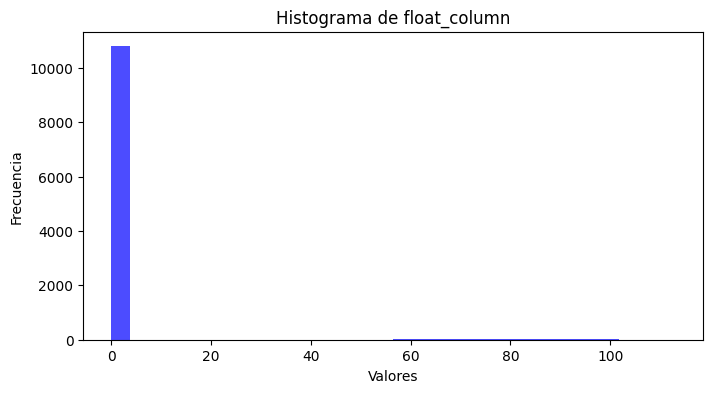

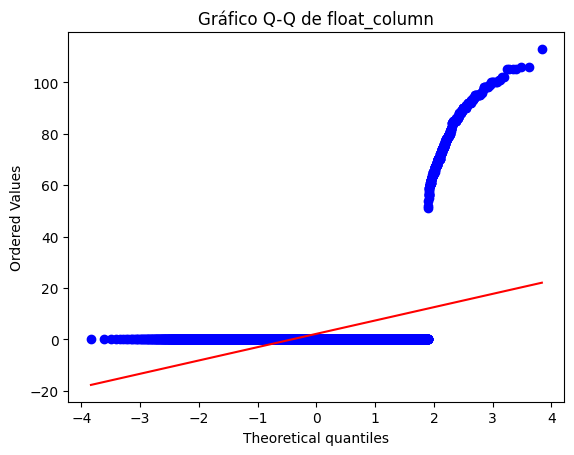

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df_atletas_cons['weight'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histograma de float_column')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
stats.probplot(df_atletas_cons['weight'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q de float_column')
plt.show()

In [ ]:
df_weight = df_atletas_cons[df_atletas_cons['weight'] != 0]
df_weight['weight'].count()

316

In [ ]:
df_atletas_cons['weight'].count()

11110

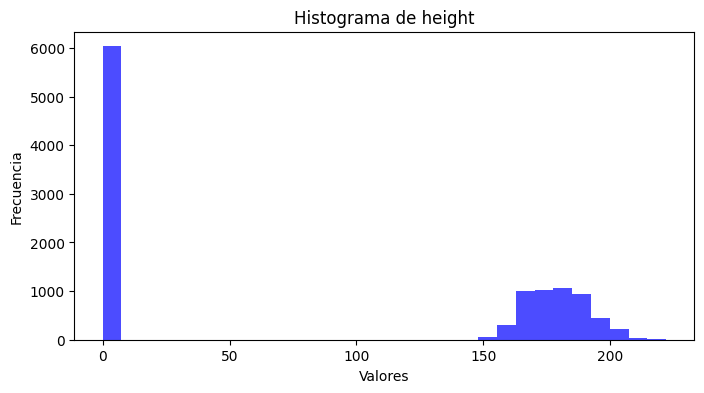

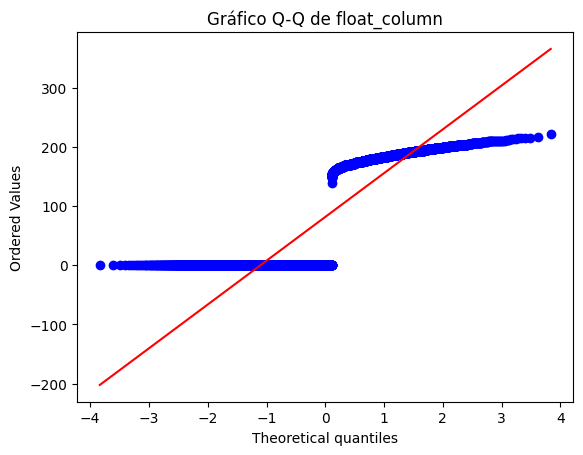

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df_atletas_cons['height'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histograma de height')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
stats.probplot(df_atletas_cons['height'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q de float_column')
plt.show()

#### imputacion de valores atipicos

In [ ]:
# los valores iguales a 0, afectan el calculo de valores atipicos, ademas se valido que las columnas de peso y talla no siguen una distribucion normal,
# por ello se va a calcular la mediana de cada columna y se reemplazara los valores iguales a 0 con la mediana calculada para cada columna
median_weight = df_atletas_cons['weight'].median()
median_weight

0.0

In [ ]:
median_height = df_atletas_cons['height'].median()
median_height

0.0

In [ ]:
# imputacion con percentil 25

# Codificación de la variable 'gender'
df_atletas_cons['gender_encoded'] = df_atletas_cons['gender'].map({'Male': 0, 'Female': 1})

#height
df_atletas_cons['height'] = df_atletas_cons.groupby(['age', 'gender_encoded', 'other_sports_dummy'])['height'].transform(
    lambda x: x.replace(0, x.median() if not x.median() == 0 else x[x != 0].quantile(0.25))
)

#weight
df_atletas_cons['weight'] = df_atletas_cons.groupby(['age', 'gender_encoded', 'other_sports_dummy'])['weight'].transform(
    lambda x: x.replace(0, x.median() if not x.median() == 0 else x[x != 0].quantile(0.25))
)

In [ ]:
df_height = df_atletas_cons[df_atletas_cons['height'] > 0]
df_height['height'].count()

10997

In [ ]:
df_atletas_cons['height'].count()

10997

In [ ]:
df_weight = df_atletas_cons[df_atletas_cons['weight'] > 0]
df_weight['weight'].count()

9660

In [ ]:
df_atletas_cons['weight'].count()

9660



#### tratamiendo de outliers luego de imputacion por percentil

In [ ]:
missing_values = count_missing_values(df_atletas_cons)
print(missing_values)

                          Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                                0                        0              0
name                                0                        0              0
name_short                          0                        0              0
gender                              0                        0              0
country                             0                        0              0
height                            113                        0            113
weight                           1450                        0           1450
occupation                          0                        0              0
education                        5579                        0           5579
age                                 0                        0              0
hero_dummy                          0                        0              0
reason_dummy                        0                        0  

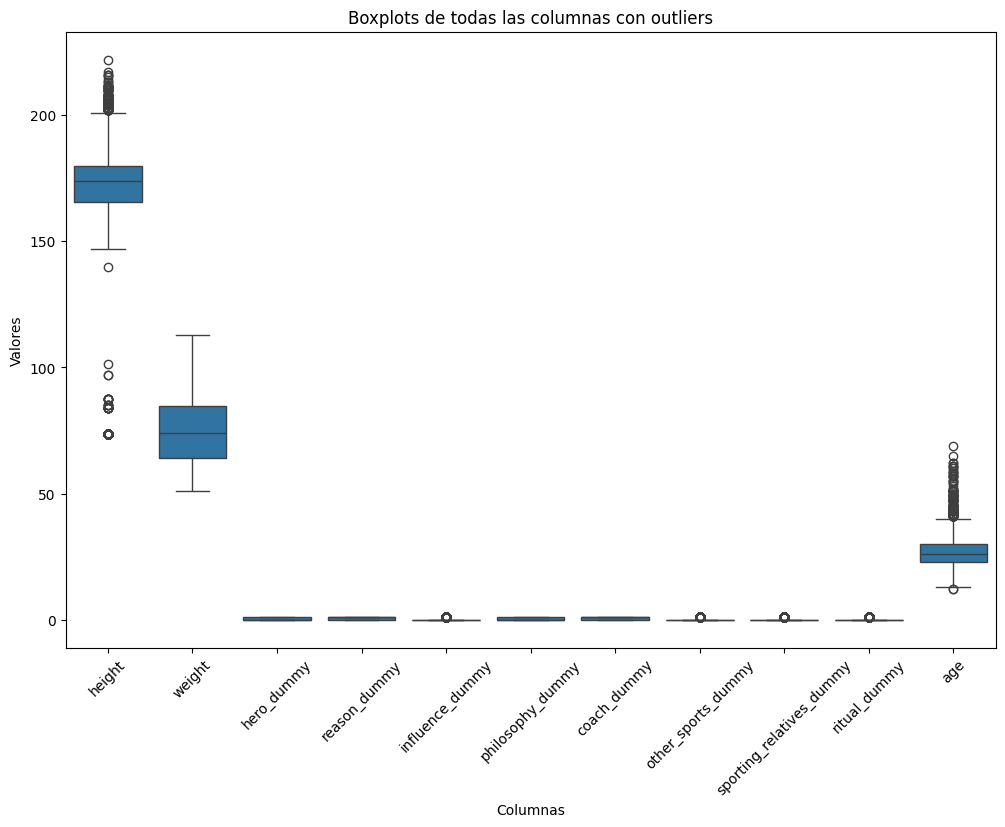

In [ ]:
columns_to_check = ['height', 'weight', 'hero_dummy', 'reason_dummy', 'influence_dummy', 'philosophy_dummy', 'coach_dummy', 'other_sports_dummy', 'sporting_relatives_dummy', 'ritual_dummy', 'age']

df_long = df_atletas_cons[columns_to_check].melt(var_name='Columnas', value_name='Valores')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Columnas', y='Valores', data=df_long)

plt.title('Boxplots de todas las columnas con outliers')
plt.xticks(rotation=45)
plt.show()

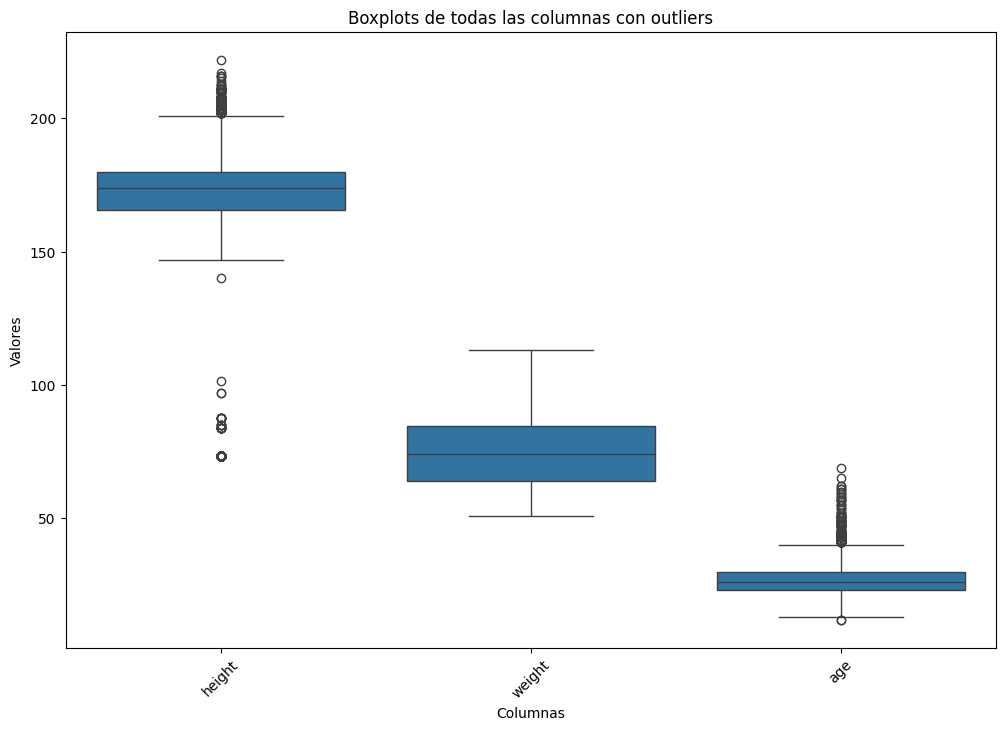

In [ ]:
columns_to_check = ['height', 'weight', 'age']

df_long = df_atletas_cons[columns_to_check].melt(var_name='Columnas', value_name='Valores')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Columnas', y='Valores', data=df_long)

plt.title('Boxplots de todas las columnas con outliers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
column_stats = df_atletas_cons['height'].describe()

def calculate_limits(column_stats):
    IQR = column_stats['75%'] - column_stats['25%']
    limite_inferior = column_stats['25%'] - 1.5 * IQR
    limite_superior = column_stats['75%'] + 1.5 * IQR
    return limite_inferior, limite_superior

limite_inferior_height, limite_superior_height = calculate_limits(column_stats)

In [ ]:
limite_inferior_height

144.375

In [ ]:
limite_superior_height

201.375

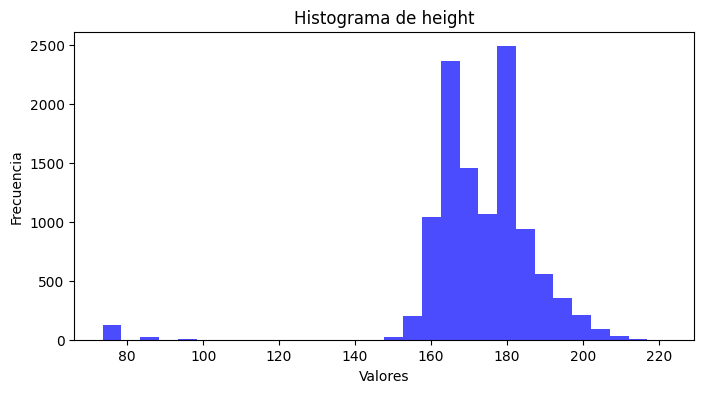

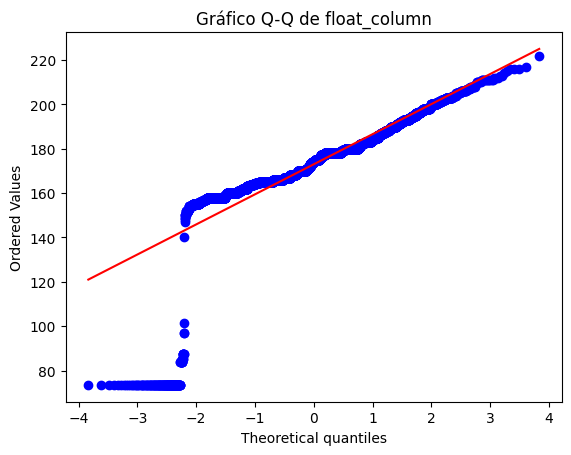

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df_atletas_cons['height'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histograma de height')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
stats.probplot(df_atletas_cons['height'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q de float_column')
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk
stat, p_value = shapiro(df_atletas_cons['height'].dropna())
print(f'Estadístico de la prueba: {stat}, Valor p: {p_value}')

if p_value > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")

Estadístico de la prueba: 0.744020696133374, Valor p: 3.182647054173527e-84
Los datos no siguen una distribución normal (se rechaza H0).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10997.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
df_atletas_cons['height'].median()

174.0

In [ ]:
# Función para identificar outliers en una columna
def identify_outliers(dataset, column, lower_limit, upper_limit):
    return dataset[(dataset[column] < lower_limit) | (dataset[column] > upper_limit)]

In [ ]:
outliers_height = identify_outliers(df_atletas_cons, 'height', limite_inferior_height, limite_superior_height)
outliers_height['height']

,height
16,73.5
46,73.5
58,73.5
89,73.5
165,87.5
...,...
10844,202.0
10846,206.0
10873,206.0
10882,214.0


In [ ]:
def replace_outliers_with_median(df, column_name, limite_inferior, limite_superior):

    median_value = df[column_name].median(skipna=True)

    df[column_name] = df[column_name].apply(
        lambda x: median_value if pd.isna(x) or x == '' or x < limite_inferior or x > limite_superior else x
    )

    return df

In [ ]:
df_atletas_cons = replace_outliers_with_median(df_atletas_cons, 'height', limite_inferior_height, limite_superior_height)
outliers_height_val = identify_outliers(df_atletas_cons, 'height', limite_inferior_height, limite_superior_height)
outliers_height_val['height']

,height


In [ ]:
missing_values = count_missing_values(df_atletas_cons)
print(missing_values)

                          Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                                0                        0              0
name                                0                        0              0
name_short                          0                        0              0
gender                              0                        0              0
country                             0                        0              0
height                              0                        0              0
weight                           1450                        0           1450
occupation                          0                        0              0
education                        5579                        0           5579
age                                 0                        0              0
hero_dummy                          0                        0              0
reason_dummy                        0                        0  

In [ ]:
# tratamiento weight
column_stats_weight = df_atletas_cons['weight'].describe()

limite_inferior_weight, limite_superior_weight = calculate_limits(column_stats_weight)

In [ ]:
limite_inferior_weight

32.875

In [ ]:

limite_superior_weight

115.875

In [ ]:
df_atletas_cons['weight'].describe()

,weight
count,9660.00000
mean,74.23957
std,11.47497
min,51.00000
25%,64.00000
50%,74.00000
75%,84.75000
max,113.00000


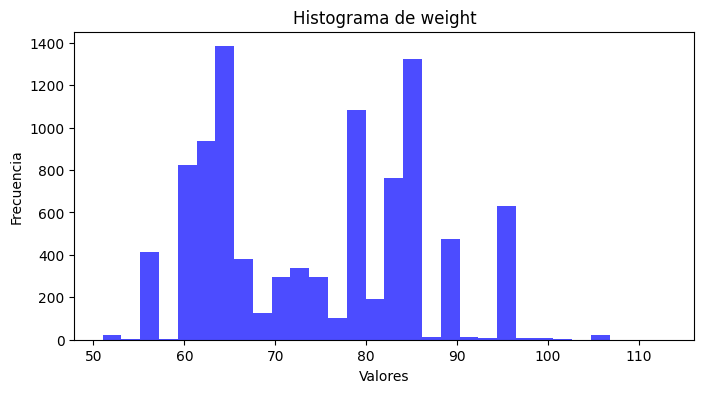

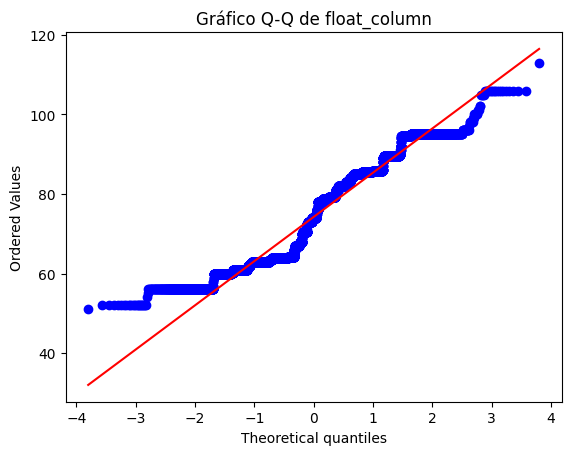

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df_atletas_cons['weight'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histograma de weight')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
stats.probplot(df_atletas_cons['weight'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q de float_column')
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk
stat, p_value = shapiro(df_atletas_cons['height'].dropna())
print(f'Estadístico de la prueba: {stat}, Valor p: {p_value}')

if p_value > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")

Estadístico de la prueba: 0.9787756620363584, Valor p: 1.4757338330297e-37
Los datos no siguen una distribución normal (se rechaza H0).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11110.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
outliers_weight = identify_outliers(df_atletas_cons, 'weight', limite_inferior_weight, limite_superior_weight)
outliers_weight['weight']

,weight


In [ ]:
## revisamos que el peso no tiene outliers, ahora verificaremos si tiene registros nulos
nulos_weight = df_atletas_cons[df_atletas_cons['weight'].isna()]
nulos_weight['weight']

,weight
13,NaN
24,NaN
29,NaN
40,NaN
54,NaN
...,...
11079,NaN
11086,NaN
11087,NaN
11099,NaN


In [ ]:
#imputamos los nulos con la funcion de outliers
df_atletas_cons = replace_outliers_with_median(df_atletas_cons, 'weight', limite_inferior_weight, limite_superior_weight)
nulos_weight = df_atletas_cons[df_atletas_cons['weight'].isna()]
nulos_weight['weight']

,weight


<ipython-input-268-9f1c45e68874>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_atletas_cons['height'], shade=True, color='blue', label='Height')
<ipython-input-268-9f1c45e68874>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_atletas_cons['weight'], shade=True, color='red', label='Weight')


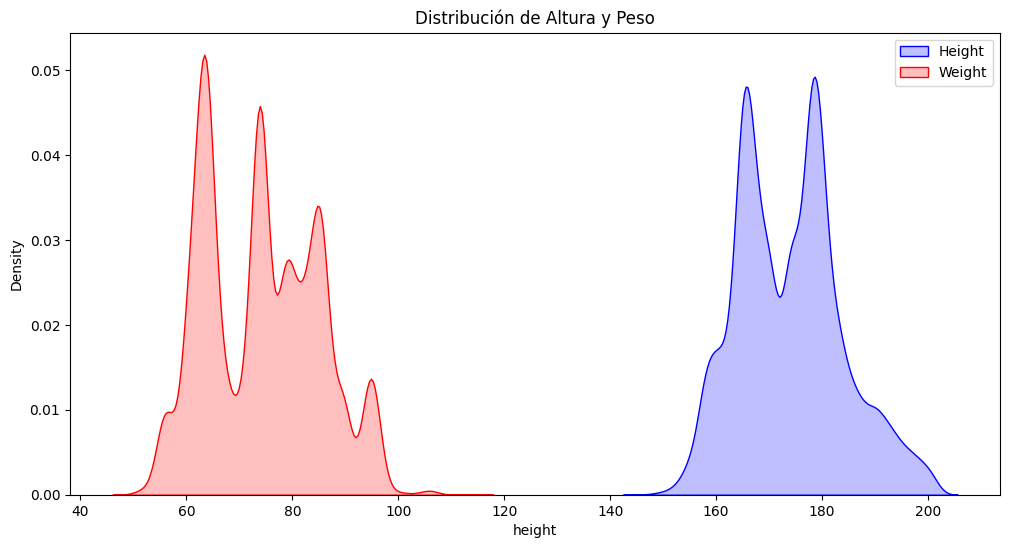

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_atletas_cons['height'], shade=True, color='blue', label='Height')
sns.kdeplot(df_atletas_cons['weight'], shade=True, color='red', label='Weight')
plt.title('Distribución de Altura y Peso')
plt.legend()
plt.show()

In [ ]:
cols_drop = ["education"]
df_atletas_cons = df_atletas_cons.drop(columns=cols_drop)

In [ ]:
missing_values = count_missing_values(df_atletas_cons)
print(missing_values)

                          Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                                0                        0              0
name                                0                        0              0
name_short                          0                        0              0
gender                              0                        0              0
country                             0                        0              0
height                              0                        0              0
weight                              0                        0              0
occupation                          0                        0              0
age                                 0                        0              0
hero_dummy                          0                        0              0
reason_dummy                        0                        0              0
influence_dummy                     0                        0  

In [ ]:
df_atletas_cons['weight'].describe()

,weight
count,11110.000000
mean,74.208303
std,10.700215
min,51.000000
25%,64.000000
50%,74.000000
75%,83.000000
max,113.000000


In [ ]:
# tratamiento age
column_stats_age = df_atletas_cons['age'].describe()

limite_inferior_age, limite_superior_age = calculate_limits(column_stats_age)
limite_inferior_age

12.5

In [ ]:
limite_superior_age

40.5

In [ ]:
df_age_filter = df_atletas_cons[df_atletas_cons['age'] == 12]
df_age_filter

,code,name,name_short,gender,country,height,weight,occupation,education,age,hero_dummy,reason_dummy,influence_dummy,philosophy_dummy,coach_dummy,ritual_dummy,sporting_relatives_dummy,other_sports_dummy,education_category,gender_encoded
4793,1908891,ZHENG Haohao,ZHENG H,Female,China,174.0,74.0,"Student, athlete",NaN,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,1
6673,1931243,SUKASEM Vareeraya,SUKASEM V,Female,Thailand,174.0,74.0,Athlete,NaN,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,1


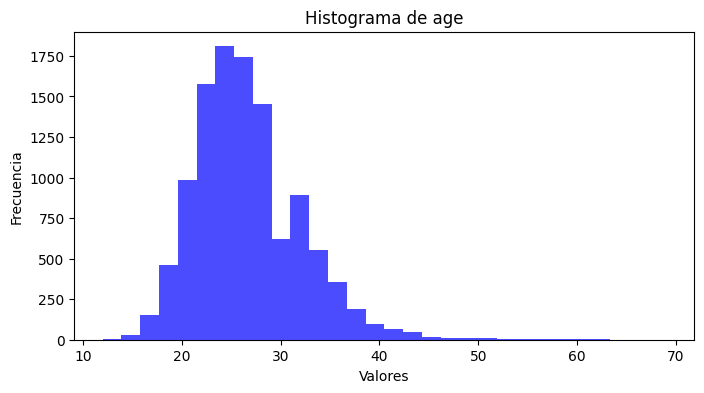

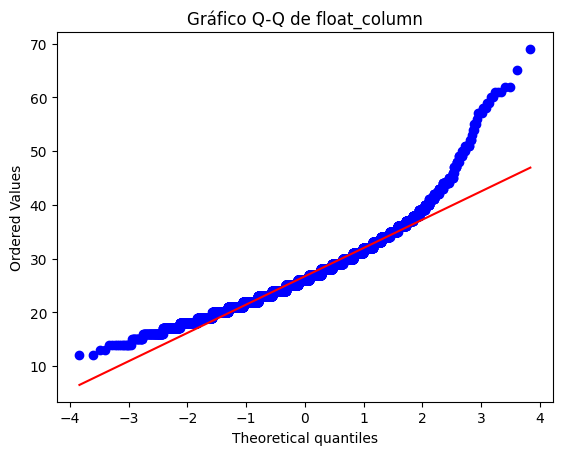

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df_atletas_cons['age'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histograma de age')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
stats.probplot(df_atletas_cons['age'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q de float_column')
plt.show()

In [ ]:
df_atletas_cons['age'].describe()

,age
count,11110.00000
mean,26.70180
std,5.41369
min,12.00000
25%,23.00000
50%,26.00000
75%,30.00000
max,69.00000


## Procesamiento dataset de equipos

In [ ]:
df_teams = pd.read_csv("teams.csv")
df_teams.head()

,code,team,team_gender,country,country_full,country_code,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,People's Republic of China,M,China,People's Republic of China,CHN,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,Colombia,M,Colombia,Colombia,COL,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN
2,ARCMTEAM3---FRA01,France,M,France,France,FRA,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN
3,ARCMTEAM3---GBR01,Great Britain,M,Great Britain,Great Britain,GBR,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN
4,ARCMTEAM3---IND01,India,M,India,India,IND,Archery,ARC,Men's Team,"['BOMMADEVARA Dhiraj', 'JADHAV Pravin Ramesh',...",NaN,"['1546108', '1546112', '1546110']",3.0,NaN,NaN


### exploracion de la data

In [ ]:
df_teams.shape

(1698, 15)

In [ ]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              1698 non-null   object 
 1   team              1698 non-null   object 
 2   team_gender       1698 non-null   object 
 3   country           1698 non-null   object 
 4   country_full      1698 non-null   object 
 5   country_code      1698 non-null   object 
 6   discipline        1698 non-null   object 
 7   disciplines_code  1698 non-null   object 
 8   events            1377 non-null   object 
 9   athletes          1695 non-null   object 
 10  coaches           246 non-null    object 
 11  athletes_codes    1695 non-null   object 
 12  num_athletes      1695 non-null   float64
 13  coaches_codes     246 non-null    object 
 14  num_coaches       246 non-null    float64
dtypes: float64(2), object(13)
memory usage: 199.1+ KB


In [ ]:
missing_values = count_missing_values(df_teams)
print(missing_values)

                  Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                        0                        0              0
team                        0                        0              0
team_gender                 0                        0              0
country                     0                        0              0
country_full                0                        0              0
country_code                0                        0              0
discipline                  0                        0              0
disciplines_code            0                        0              0
events                    321                        0            321
athletes                    3                        0              3
coaches                  1452                        0           1452
athletes_codes              3                        0              3
num_athletes                3                        0              3
coaches_codes       

### Tratamiendo de algunas columnas

In [ ]:
#La columna athletes_code tiene los id de los atletas como listas, se hara explode del dataset para tener un registro por cada atleta

df_teams['athletes_codes'] = df_teams['athletes_codes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Aplicar explode para dividir los elementos de la lista en filas separadas
df_teams_exploded = df_teams.explode('athletes_codes')
df_teams_exploded.head(5)

,code,team,team_gender,country,country_full,country_code,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,People's Republic of China,M,China,People's Republic of China,CHN,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,1913366,3.0,NaN,NaN
0,ARCMTEAM3---CHN01,People's Republic of China,M,China,People's Republic of China,CHN,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,1913367,3.0,NaN,NaN
0,ARCMTEAM3---CHN01,People's Republic of China,M,China,People's Republic of China,CHN,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,1913369,3.0,NaN,NaN
1,ARCMTEAM3---COL01,Colombia,M,Colombia,Colombia,COL,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,1935642,3.0,NaN,NaN
1,ARCMTEAM3---COL01,Colombia,M,Colombia,Colombia,COL,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,1543412,3.0,NaN,NaN


In [ ]:
df_teams_exploded.shape

(7801, 15)

In [ ]:
missing_values = count_missing_values(df_teams_exploded)
print(missing_values)

                  Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                        0                        0              0
team                        0                        0              0
team_gender                 0                        0              0
country                     0                        0              0
country_full                0                        0              0
country_code                0                        0              0
discipline                  0                        0              0
disciplines_code            0                        0              0
events                   1243                        0           1243
athletes                    3                        0              3
coaches                  4949                        0           4949
athletes_codes              3                        0              3
num_athletes                3                        0              3
coaches_codes       

In [ ]:
columns_to_drop = ['events', 'athletes', 'coaches', 'num_athletes', 'coaches_codes', 'num_coaches']
df_teams_exploded = df_teams_exploded.drop(columns=columns_to_drop)
missing_values = count_missing_values(df_teams_exploded)
print(missing_values)

                  Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                        0                        0              0
team                        0                        0              0
team_gender                 0                        0              0
country                     0                        0              0
country_full                0                        0              0
country_code                0                        0              0
discipline                  0                        0              0
disciplines_code            0                        0              0
athletes_codes              3                        0              3


In [ ]:
df_teams_exploded = df_teams_exploded.dropna(subset=['athletes_codes'])
missing_values = count_missing_values(df_teams_exploded)
print(missing_values)

                  Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
code                        0                        0              0
team                        0                        0              0
team_gender                 0                        0              0
country                     0                        0              0
country_full                0                        0              0
country_code                0                        0              0
discipline                  0                        0              0
disciplines_code            0                        0              0
athletes_codes              0                        0              0


## Procesamiento de dataset de medallistas

In [ ]:
df_medallistas = pd.read_csv("medallists.csv")
df_medallistas.head(5)

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525


### Exploracion del dataset

In [ ]:
df_medallistas.shape

(2271, 16)

In [ ]:
columns_to_drop = ['name', 'gender', 'team_gender', 'country', 'country_code', 'nationality', 'team', 'birth_date']
df_medallistas = df_medallistas.drop(columns=columns_to_drop)

In [ ]:
missing_values = count_missing_values(df_medallistas)
print(missing_values)

            Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
medal_date            0                        0              0
medal_type            0                        0              0
medal_code            0                        0              0
discipline            0                        0              0
event                 0                        0              0
event_type            0                        0              0
url_event             0                        0              0
code                  0                        0              0


In [ ]:
valores_repetidos_me = df_medallistas['code'].value_counts()

print(valores_repetidos_me)

code
1945125    6
1946218    5
1935984    5
1909294    5
1935923    5
          ..
1574121    1
1574114    1
1888932    1
1574134    1
1908359    1
Name: count, Length: 2029, dtype: int64


In [ ]:
df_teams_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7798 entries, 0 to 1697
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              7798 non-null   object
 1   team              7798 non-null   object
 2   team_gender       7798 non-null   object
 3   country           7798 non-null   object
 4   country_full      7798 non-null   object
 5   country_code      7798 non-null   object
 6   discipline        7798 non-null   object
 7   disciplines_code  7798 non-null   object
 8   athletes_codes    7798 non-null   object
dtypes: object(9)
memory usage: 609.2+ KB


In [ ]:
df_teams_exploded.describe()

,code,team,team_gender,country,country_full,country_code,discipline,disciplines_code,athletes_codes
count,7798,7798,7798,7798,7798,7798,7798,7798,7798
unique,1695,494,4,104,104,104,28,28,6530
top,FBLMTEAM11--ESP01,United States of America,M,United States,United States of America,USA,Swimming,SWM,1946177
freq,22,735,3252,777,777,777,1556,1556,26


In [ ]:
columna = df_teams_exploded['athletes_codes']

valores_unicos = columna.unique()

print(valores_unicos)

['1913366' '1913367' '1913369' ... '1908373' '1908395' '1908381']


In [ ]:
df_filtrado = df_teams_exploded[df_teams_exploded['athletes_codes'].str.match('^[A-Za-z]')]
df_filtrado

,code,team,team_gender,country,country_full,country_code,discipline,disciplines_code,athletes_codes
1100,T000180168080,United States of America,M,United States,United States of America,USA,Swimming,SWM,A058159120057
1100,T000180168080,United States of America,M,United States,United States of America,USA,Swimming,SWM,A160201175025
1100,T000180168080,United States of America,M,United States,United States of America,USA,Swimming,SWM,A158032245251
1100,T000180168080,United States of America,M,United States,United States of America,USA,Swimming,SWM,A178191113142
1103,T005092223144,Australia,W,Australia,Australia,AUS,Swimming,SWM,A151028178217
...,...,...,...,...,...,...,...,...,...
1449,T94172565,Jamaica,W,Jamaica,Jamaica,JAM,Athletics,ATH,A14824259
1450,T96104270,United States of America,X,United States,United States of America,USA,Athletics,ATH,A14746488
1450,T96104270,United States of America,X,United States,United States of America,USA,Athletics,ATH,A14807359
1453,T97087390,Colombia,X,Colombia,Colombia,COL,Athletics,ATH,A14762558


## Generando tablon de medallistas con sus equipos

In [ ]:
#Preparando dataset de equipos y medallistas para generar un tablos de medallistas con sus equipos

In [ ]:
df_teams_exploded['athletes_codes'] = df_teams_exploded['athletes_codes'].astype(str)

In [ ]:
valores_repetidos = df_teams_exploded['athletes_codes'].value_counts()

print(valores_repetidos)

athletes_codes
1946177          26
A058159120057    23
1946227          20
1945125          17
1945159          17
                 ..
1927111           1
1927156           1
1927140           1
1927128           1
1908381           1
Name: count, Length: 6530, dtype: int64


In [ ]:
df_teams_exploded = df_teams_exploded.drop_duplicates(subset=['athletes_codes'])

In [ ]:
valores_repetidos = df_teams_exploded['athletes_codes'].value_counts()

print(valores_repetidos)

athletes_codes
1913366    1
1970495    1
1950397    1
1564657    1
1564653    1
          ..
1977147    1
1943569    1
4665325    1
1943574    1
1908381    1
Name: count, Length: 6530, dtype: int64


In [ ]:
df_medallistas['code'] = df_medallistas['code'].astype(str)

In [ ]:
valores_repetidos = df_medallistas['code'].value_counts()

print(valores_repetidos)

code
1945125    6
1946218    5
1935984    5
1909294    5
1935923    5
          ..
1574121    1
1574114    1
1888932    1
1574134    1
1908359    1
Name: count, Length: 2029, dtype: int64


In [ ]:
df_medallistas = df_medallistas.drop_duplicates(subset=['code'])
valores_repetidos = df_medallistas['code'].value_counts()

print(valores_repetidos)

code
1903136    1
1923518    1
1912532    1
1912507    1
1912519    1
          ..
1544424    1
1551443    1
1566738    1
1904039    1
1908359    1
Name: count, Length: 2029, dtype: int64


In [ ]:
## Join de medallistas con team
df_medallistas_teams = pd.merge(df_medallistas, df_teams_exploded, left_on='code', right_on='athletes_codes', how='inner')
df_medallistas_teams

,medal_date,medal_type,medal_code,discipline_x,event,event_type,url_event,code_x,code_y,team,team_gender,country,country_full,country_code,discipline_y,disciplines_code,athletes_codes
0,2024-07-27,Silver Medal,2,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,CTRMPURTEAM4ITA01,Italy,M,Italy,Italy,ITA,Cycling Track,CTR,1923520
1,2024-07-27,Bronze Medal,3,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1955079,CTRWPURTEAM4USA01,United States of America,W,United States,United States of America,USA,Cycling Track,CTR,1955079
2,2024-07-27,Gold Medal,1,Fencing,Men's Sabre Individual,HATH,/en/paris-2024/results/fencing/men-s-sabre-ind...,1927149,FENMTEAMSABRKOR01,Republic of Korea,M,Korea,Republic of Korea,KOR,Fencing,FEN,1927149
3,2024-07-27,Bronze Medal,3,Fencing,Men's Sabre Individual,HATH,/en/paris-2024/results/fencing/men-s-sabre-ind...,1924595,FENMTEAMSABRITA01,Italy,M,Italy,Italy,ITA,Fencing,FEN,1924595
4,2024-07-27,Silver Medal,2,Fencing,Women's Épée Individual,HATH,/en/paris-2024/results/fencing/women-s-epee-in...,1916183,FENWTEAMEPEEFRA01,France,W,France,France,FRA,Fencing,FEN,1916183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2024-08-11,Bronze Medal,3,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1908350,WPOMTEAM7---USA01,United States of America,M,United States,United States of America,USA,Water Polo,WPO,1908350
1523,2024-08-11,Bronze Medal,3,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1908354,WPOMTEAM7---USA01,United States of America,M,United States,United States of America,USA,Water Polo,WPO,1908354
1524,2024-08-11,Bronze Medal,3,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1908355,WPOMTEAM7---USA01,United States of America,M,United States,United States of America,USA,Water Polo,WPO,1908355
1525,2024-08-11,Bronze Medal,3,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1908361,WPOMTEAM7---USA01,United States of America,M,United States,United States of America,USA,Water Polo,WPO,1908361


### Exploracion del tablon

In [ ]:
df_medallistas_teams.shape

(1527, 17)

In [ ]:
df_medallistas_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   medal_date        1527 non-null   object
 1   medal_type        1527 non-null   object
 2   medal_code        1527 non-null   int64 
 3   discipline_x      1527 non-null   object
 4   event             1527 non-null   object
 5   event_type        1527 non-null   object
 6   url_event         1527 non-null   object
 7   code_x            1527 non-null   object
 8   code_y            1527 non-null   object
 9   team              1527 non-null   object
 10  team_gender       1527 non-null   object
 11  country           1527 non-null   object
 12  country_full      1527 non-null   object
 13  country_code      1527 non-null   object
 14  discipline_y      1527 non-null   object
 15  disciplines_code  1527 non-null   object
 16  athletes_codes    1527 non-null   object
dtypes: int64(1), o

In [ ]:
missing_values = count_missing_values(df_medallistas_teams)
print(missing_values)

                  Nulos (NaN)  Vacios (Cadenas Vacías)  Total Missing
medal_date                  0                        0              0
medal_type                  0                        0              0
medal_code                  0                        0              0
discipline_x                0                        0              0
event                       0                        0              0
event_type                  0                        0              0
url_event                   0                        0              0
code_x                      0                        0              0
code_y                      0                        0              0
team                        0                        0              0
team_gender                 0                        0              0
country                     0                        0              0
country_full                0                        0              0
country_code        

### tratamiento de algunas columnas

In [ ]:
columns_to_drop = ['discipline_x', 'event', 'event_type', 'url_event', 'code_x', 'code_y', 'team_gender', 'country', 'country_full', 'country_code', 'disciplines_code']
df_medallistas_teams = df_medallistas_teams.drop(columns=columns_to_drop)
df_medallistas_teams

,medal_date,medal_type,medal_code,team,discipline_y,athletes_codes
0,2024-07-27,Silver Medal,2,Italy,Cycling Track,1923520
1,2024-07-27,Bronze Medal,3,United States of America,Cycling Track,1955079
2,2024-07-27,Gold Medal,1,Republic of Korea,Fencing,1927149
3,2024-07-27,Bronze Medal,3,Italy,Fencing,1924595
4,2024-07-27,Silver Medal,2,France,Fencing,1916183
...,...,...,...,...,...,...
1522,2024-08-11,Bronze Medal,3,United States of America,Water Polo,1908350
1523,2024-08-11,Bronze Medal,3,United States of America,Water Polo,1908354
1524,2024-08-11,Bronze Medal,3,United States of America,Water Polo,1908355
1525,2024-08-11,Bronze Medal,3,United States of America,Water Polo,1908361


In [ ]:
valores_repetidos = df_atletas_cons['code'].value_counts()
print(valores_repetidos)

code
1532872    1
1940300    1
1940260    1
1940261    1
1940262    1
          ..
1897557    1
1897558    1
1897559    1
1897560    1
9460001    1
Name: count, Length: 11110, dtype: int64


In [ ]:
df_atletas_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      11110 non-null  int64  
 1   name                      11110 non-null  object 
 2   name_short                11110 non-null  object 
 3   gender                    11110 non-null  object 
 4   country                   11110 non-null  object 
 5   height                    11110 non-null  float64
 6   weight                    11110 non-null  float64
 7   occupation                11110 non-null  object 
 8   age                       11110 non-null  int64  
 9   hero_dummy                11110 non-null  float64
 10  reason_dummy              11110 non-null  float64
 11  influence_dummy           11110 non-null  float64
 12  philosophy_dummy          11110 non-null  float64
 13  coach_dummy               11110 non-null  float64
 14  ritual

## Generando tablon de atletas medallistas

In [ ]:
df_atletas_cons['code'] = df_atletas_cons['code'].astype(str)

df_atletas_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      11110 non-null  object 
 1   name                      11110 non-null  object 
 2   name_short                11110 non-null  object 
 3   gender                    11110 non-null  object 
 4   country                   11110 non-null  object 
 5   height                    11110 non-null  float64
 6   weight                    11110 non-null  float64
 7   occupation                11110 non-null  object 
 8   age                       11110 non-null  int64  
 9   hero_dummy                11110 non-null  float64
 10  reason_dummy              11110 non-null  float64
 11  influence_dummy           11110 non-null  float64
 12  philosophy_dummy          11110 non-null  float64
 13  coach_dummy               11110 non-null  float64
 14  ritual

In [ ]:
df_medallistas_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   medal_date      1527 non-null   object
 1   medal_type      1527 non-null   object
 2   medal_code      1527 non-null   int64 
 3   team            1527 non-null   object
 4   discipline_y    1527 non-null   object
 5   athletes_codes  1527 non-null   object
dtypes: int64(1), object(5)
memory usage: 71.7+ KB


In [ ]:
## creacion de tablon de los atletas medallistas
df_atletas_medallistas = pd.merge(df_atletas_cons, df_medallistas_teams, left_on='code', right_on='athletes_codes', how='inner')
df_atletas_medallistas

,code,name,name_short,gender,country,height,weight,occupation,age,hero_dummy,...,sporting_relatives_dummy,other_sports_dummy,education_category,gender_encoded,medal_date,medal_type,medal_code,team,discipline_y,athletes_codes
0,1535349,OLVERA IBARRA Osmar,OLVERA IBARRA O,Male,Mexico,177.0,74.00,Athlete,20,0.0,...,0.0,0.0,Unknown,0,2024-08-08,Bronze Medal,3,Mexico,Diving,1535349
1,1535420,VALENCIA Alejandra,VALENCIA A,Female,Mexico,158.0,70.50,"Athlete, sport soldier",29,0.0,...,0.0,0.0,student,1,2024-07-28,Bronze Medal,3,Mexico,Archery,1535420
2,1535429,RUIZ Angela,RUIZ A,Female,Mexico,162.0,74.00,"Athlete, student",18,0.0,...,0.0,0.0,Unknown,1,2024-07-28,Bronze Medal,3,Mexico,Archery,1535429
3,1536197,CELAYA HERNANDEZ Juan Manuel,CELAYA HERNANDEZ J,Male,Mexico,178.0,79.25,Athlete,26,0.0,...,0.0,0.0,student,0,2024-08-02,Silver Medal,2,Mexico,Diving,1536197
4,1536479,VAZQUEZ Ana,VAZQUEZ A,Female,Mexico,165.0,60.00,"Athlete, sport soldier",23,0.0,...,1.0,0.0,other,1,2024-07-28,Bronze Medal,3,Mexico,Archery,1536479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,4975921,EPPIE Lee Bhekempilo,EPPIE LB,Male,Botswana,173.0,89.50,Athlete,25,0.0,...,0.0,0.0,Unknown,0,2024-08-10,Silver Medal,2,Botswana,Athletics,4975921
1520,4979555,BUTLER Aaliyah,BUTLER A,Female,United States,162.0,63.00,Student athlete,20,0.0,...,1.0,0.0,other,1,2024-08-10,Gold Medal,1,United States of America,Athletics,4979555
1521,4979557,WHITTAKER Isabella,WHITTAKER I,Female,United States,167.0,64.25,"Athlete, student",22,0.0,...,0.0,0.0,graduado,1,2024-08-03,Silver Medal,2,United States of America,Athletics,4979557
1522,4979564,WILSON Quincy,WILSON Q,Male,United States,175.0,74.00,"Athlete, student",16,0.0,...,1.0,0.0,other,0,2024-08-03,Silver Medal,2,United States of America,Athletics,4979564


### Exploracion del tablon

In [ ]:
valores_repetidos = df_atletas_medallistas['code'].value_counts()

print(valores_repetidos)

code
1535349    1
1945206    1
1945644    1
1945392    1
1945383    1
          ..
1902902    1
1902901    1
1902893    1
1902892    1
4980004    1
Name: count, Length: 1524, dtype: int64


In [ ]:
df_atletas_medallistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      1524 non-null   object 
 1   name                      1524 non-null   object 
 2   name_short                1524 non-null   object 
 3   gender                    1524 non-null   object 
 4   country                   1524 non-null   object 
 5   height                    1524 non-null   float64
 6   weight                    1524 non-null   float64
 7   occupation                1524 non-null   object 
 8   age                       1524 non-null   int64  
 9   hero_dummy                1524 non-null   float64
 10  reason_dummy              1524 non-null   float64
 11  influence_dummy           1524 non-null   float64
 12  philosophy_dummy          1524 non-null   float64
 13  coach_dummy               1524 non-null   float64
 14  ritual_d

In [ ]:
df_atletas_medallistas.to_csv('df_atletas_medallistas.csv', index=False)

### analisis del tablon

In [ ]:
df_atletas_medallistas_selected = df_atletas_medallistas[['code', 'name', 'gender', 'country', 'medal_type', 'team', 'discipline_y']]

df_gold_usa = df_atletas_medallistas_selected[(df_atletas_medallistas_selected['country'] == "United States") & (df_atletas_medallistas_selected['medal_type'] == "Gold Medal")]
df_gold_usa

,code,name,gender,country,medal_type,team,discipline_y
849,1935869,ALEXY Jack,Male,United States,Gold Medal,United States of America,Swimming
850,1935871,ARMSTRONG Hunter,Male,United States,Gold Medal,United States of America,Swimming
854,1935895,DOUGLASS Kate,Female,United States,Gold Medal,United States of America,Swimming
855,1935896,DRESSEL Caeleb,Male,United States,Gold Medal,United States of America,Swimming
859,1935911,GUILIANO Chris,Male,United States,Gold Medal,United States of America,Swimming
...,...,...,...,...,...,...,...
1304,1965289,NORMAN Michael,Male,United States,Gold Medal,United States of America,Athletics
1333,1965868,THOMAS Gabrielle,Female,United States,Gold Medal,United States of America,Athletics
1334,1965942,TERRY Twanisha,Female,United States,Gold Medal,United States of America,Athletics
1517,4665325,BETHUNE Croix,Female,United States,Gold Medal,United States of America,Football


## Generando tablon de atletas que ganaron o no alguna medalla

In [ ]:
## creacion de tablon de los atletas que ganaron o no una medalla
df_atletas = pd.merge(df_atletas_cons, df_medallistas_teams, left_on='code', right_on='athletes_codes', how='outer')
df_atletas

,code,name,name_short,gender,country,height,weight,occupation,age,hero_dummy,...,sporting_relatives_dummy,other_sports_dummy,education_category,gender_encoded,medal_date,medal_type,medal_code,team,discipline_y,athletes_codes
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Male,Armenia,182.5,94.5,Athlete,32.0,1.0,...,0.0,0.0,graduado,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Male,Armenia,180.0,89.5,Athlete,25.0,0.0,...,1.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Male,Armenia,178.0,95.0,Athlete,27.0,0.0,...,0.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Male,Armenia,178.0,82.0,Athlete,24.0,1.0,...,0.0,0.0,master,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Male,Armenia,178.0,82.0,Athlete,24.0,0.0,...,0.0,0.0,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,4986655,ADA ETO Sefora,ADA ETO S,Female,Equatorial Guinea,165.0,67.0,Athlete,21.0,0.0,...,0.0,0.0,Unknown,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11109,9460001,LIUZZI Emanuela,LIUZZI E,Female,Italy,166.0,61.0,Athlete,24.0,0.0,...,0.0,0.0,Unknown,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-08-02,Bronze Medal,3.0,France,Equestrian,1899865
11111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-08-03,Gold Medal,1.0,Netherlands,Athletics,1972077


### tratamiento del tablon

In [ ]:
df_atletas = df_atletas.dropna(subset=['code'])
df_atletas

,code,name,name_short,gender,country,height,weight,occupation,age,hero_dummy,...,sporting_relatives_dummy,other_sports_dummy,education_category,gender_encoded,medal_date,medal_type,medal_code,team,discipline_y,athletes_codes
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Male,Armenia,182.5,94.5,Athlete,32.0,1.0,...,0.0,0.0,graduado,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Male,Armenia,180.0,89.5,Athlete,25.0,0.0,...,1.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Male,Armenia,178.0,95.0,Athlete,27.0,0.0,...,0.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Male,Armenia,178.0,82.0,Athlete,24.0,1.0,...,0.0,0.0,master,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Male,Armenia,178.0,82.0,Athlete,24.0,0.0,...,0.0,0.0,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,4982175,JOSEPH Elijah,JOSEPH E,Male,Trinidad and Tobago,177.0,85.5,Athlete,23.0,0.0,...,0.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11106,4982762,HOMAN Khrystyna,HOMAN K,Female,Ukraine,170.0,67.5,Athlete,25.0,0.0,...,0.0,1.0,graduado,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11107,4983537,CHELANGAT Annet Chemengich,CHELANGAT AC,Female,Uganda,174.0,73.0,Athlete,31.0,0.0,...,0.0,0.0,Unknown,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11108,4986655,ADA ETO Sefora,ADA ETO S,Female,Equatorial Guinea,165.0,67.0,Athlete,21.0,0.0,...,0.0,0.0,Unknown,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_atletas.to_csv('df_atletas.csv', index=False)

In [ ]:
df_atletas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11110 entries, 0 to 11109
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      11110 non-null  object 
 1   name                      11110 non-null  object 
 2   name_short                11110 non-null  object 
 3   gender                    11110 non-null  object 
 4   country                   11110 non-null  object 
 5   height                    11110 non-null  float64
 6   weight                    11110 non-null  float64
 7   occupation                11110 non-null  object 
 8   age                       11110 non-null  float64
 9   hero_dummy                11110 non-null  float64
 10  reason_dummy              11110 non-null  float64
 11  influence_dummy           11110 non-null  float64
 12  philosophy_dummy          11110 non-null  float64
 13  coach_dummy               11110 non-null  float64
 14  ritual_dumm

### Analisis del tablon

## Modelado

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df_final_with_country = df_atletas.copy()
df_final_with_country['won_medal'] = df_final_with_country['medal_date'].notnull()
df_country = df_final_with_country.groupby('country').agg(
    num_atletas=('code', 'count'),
    promedio_altura=('height', 'mean'),
    promedio_peso=('weight', 'mean'),
    total_medallas=('won_medal', 'sum'),
    porcentaje_medallas=('won_medal', 'mean')
).reset_index()
df_country['alta_prob_medallas'] = (df_country['porcentaje_medallas'] > 0.5).astype(int)
X_country = df_country.drop(columns=['country', 'alta_prob_medallas'])
y_country = df_country['alta_prob_medallas']
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_country, y_country, test_size=0.2, random_state=42)
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_country, y_country, test_size=0.2, random_state=42)
rf_model_country = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_country.fit(X_train_country, y_train_country)
y_pred_country = rf_model_country.predict(X_test_country)

accuracy_country = accuracy_score(y_test_country, y_pred_country)
print(f'Precisión del modelo: {accuracy_country * 100:.2f}%')

df_country['prediccion_alta_prob'] = rf_model_country.predict(X_country)


Precisión del modelo: 100.00%


In [ ]:
# Instalar la librería si es necesario
!pip install imbalanced-learn

# Asignar la columna de probabilidad de medallas con el nuevo umbral
df_country['alta_prob_medallas'] = (df_country['porcentaje_medallas'] > 0.3).astype(int)

# Importar SMOTE de imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_country = df_country.drop(columns=['country', 'alta_prob_medallas'])
y_country = df_country['alta_prob_medallas']
X_smote, y_smote = smote.fit_resample(X_country, y_country)

# Entrenar el modelo de Random Forest con los datos balanceados
rf_model_smote = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
)

# Evaluar el modelo con validación cruzada
cv_scores_smote = cross_val_score(rf_model_smote, X_smote, y_smote, cv=5, scoring='accuracy')
cv_mean_accuracy_smote = cv_scores_smote.mean()
print(f'Precisión promedio con SMOTE: {cv_mean_accuracy_smote * 100:.2f}%')


Precisión promedio con SMOTE: 99.75%


<h3> Se ha revisado que el dataset contiene datos desbalanceados por lo que se uso la tecnica de SMOTE para balancear los datos y poder eliminar el sobreajuste
</h3>

## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   cluster  num_atletas_avg  promedio_altura_avg  promedio_peso_avg  \
0        0        17.114286           168.789758          71.737646   
1        1        27.607477           174.323187          77.288280   
2        2       134.157895           174.926841          75.178143   
3        3       440.900000           173.835045          73.490816   

   porcentaje_medallas_avg  total_paises  
0                 0.006006            70  
1                 0.006736           107  
2                 0.205623            19  
3                 0.229767            10  


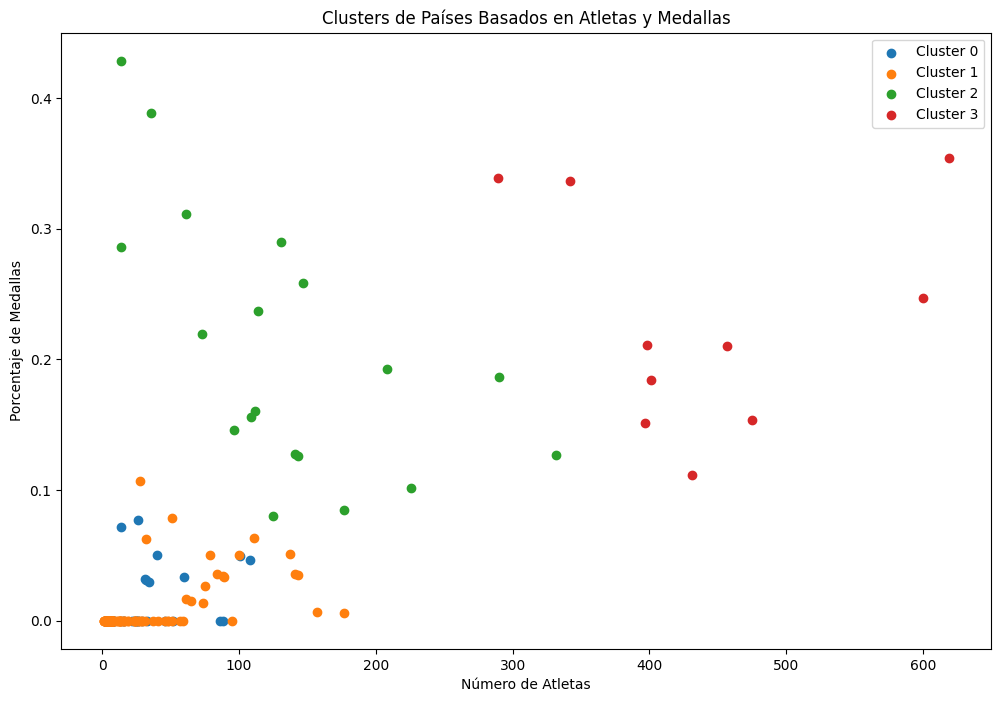


Clusters ordenados por mayor posibilidad de ganar medallas:
   cluster  num_atletas_avg  promedio_altura_avg  promedio_peso_avg  \
3        3       440.900000           173.835045          73.490816   
2        2       134.157895           174.926841          75.178143   
1        1        27.607477           174.323187          77.288280   
0        0        17.114286           168.789758          71.737646   

   porcentaje_medallas_avg  total_paises  
3                 0.229767            10  
2                 0.205623            19  
1                 0.006736           107  
0                 0.006006            70  

El Cluster 3.0 tiene la mayor posibilidad de ganar medallas, con un porcentaje promedio de 22.98% de medallas ganadas.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_country_scaled = scaler.fit_transform(X_country)

n_clusters = 4

# Aplicar el modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_country['cluster'] = kmeans.fit_predict(X_country_scaled)

# Describir los clusters con características clave
# Agrupamos los datos por cluster y calculamos los promedios de cada característica
cluster_summary = df_country.groupby('cluster').agg(
    num_atletas_avg=('num_atletas', 'mean'),
    promedio_altura_avg=('promedio_altura', 'mean'),
    promedio_peso_avg=('promedio_peso', 'mean'),
    porcentaje_medallas_avg=('porcentaje_medallas', 'mean'),
    total_paises=('country', 'count')
).reset_index()

# Mostrar el resumen de cada cluster
print(cluster_summary)

# Graficar las características de los clusters
plt.figure(figsize=(12, 8))
for cluster_num in range(n_clusters):
    cluster_data = df_country[df_country['cluster'] == cluster_num]
    plt.scatter(cluster_data['num_atletas'], cluster_data['porcentaje_medallas'], label=f'Cluster {cluster_num}')

plt.xlabel('Número de Atletas')
plt.ylabel('Porcentaje de Medallas')
plt.title('Clusters de Países Basados en Atletas y Medallas')
plt.legend()
plt.show()

# Analizar los clusters con mayor posibilidad de ganar medallas
cluster_medallas = cluster_summary.sort_values(by='porcentaje_medallas_avg', ascending=False)
print("\nClusters ordenados por mayor posibilidad de ganar medallas:")
print(cluster_medallas)

# Conclusión sobre los clusters con mayor posibilidad de ganar medallas
mejor_cluster = cluster_medallas.iloc[0]
print(f"\nEl Cluster {mejor_cluster['cluster']} tiene la mayor posibilidad de ganar medallas, "
      f"con un porcentaje promedio de {mejor_cluster['porcentaje_medallas_avg']*100:.2f}% de medallas ganadas.")


<p>El 3er Cluster contiene al mejor grupo con caracteristicas mas favorables para conseguir medallas</p>